### 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### 2. Load Dataset & Rename Columns

In [ ]:
df = pd.read_csv('../data/raw/netflix_titles.csv')
df.head()

,m_id,m_title,m_year,m_maturity,m_runtime,m_genre,m_synopsis,m_lead_cast,m_genres,m_mood,m_audio,m_subtitles,m_cast
0,81416533,Heart of Stone,2023.0,U/A 13+,2h 5m,Action,An intelligence operative for a shadowy global...,"Gal Gadot,Jamie Dornan,Alia Bhatt","['Dramas', 'Action & Adventure Movies', 'Spy M...",['Adrenaline Rush'],"['English - Audio Description,', 'English [Ori...",['English'],"['Gal Gadot', 'Jamie Dornan', 'Alia Bhatt', 'S..."
1,80210920,The Mother,2023.0,U/A 16+,1h 57m,Action,A military-trained assassin comes out of hidin...,"Jennifer Lopez,Joseph Fiennes,Gael García Bernal","['Dramas', 'Action & Adventure Movies', 'US Mo...","['Gritty,', 'Understated,', 'Suspenseful']","['English - Audio Description,', 'English [Ori...",['English'],"['Jennifer Lopez', 'Joseph Fiennes', 'Gael Gar..."
2,81161626,Red Notice,2021.0,U/A 13+,1h 58m,Action,An FBI profiler pursuing the world's most want...,"Dwayne Johnson,Ryan Reynolds,Gal Gadot","['Crime Movies', 'Comedy Movies', 'Action & Ad...",['Exciting'],"['English - Audio Description,', 'English [Ori...",['English'],"['Dwayne Johnson', 'Ryan Reynolds', 'Gal Gadot..."
3,80230399,Extraction,2020.0,A,1h 58m,Action,A hardened gun-for-hire's latest mission becom...,"Chris Hemsworth,Rudhraksh Jaiswal,Randeep Hooda","['Movies Based on Books', 'Action & Adventure ...","['Violent,', 'Gritty']","['English - Audio Description,', 'English [Ori...",['English'],"['Chris Hemsworth', 'Rudhraksh Jaiswal', 'Rand..."
4,81098494,Extraction 2,2023.0,A,2h 3m,Action,"Back from the brink of death, highly skilled c...","Chris Hemsworth,Golshifteh Farahani,Tornike Go...","['Action & Adventure Movies', 'US Movies']","['Violent,', 'Gritty']","['English - Audio Description,', 'English [Ori...",['English'],"['Chris Hemsworth', 'Golshifteh Farahani', 'To..."


In [18]:
# Rename columns for clarity
df.rename(columns={
    'm_id': 'id',
    'm_title': 'title',
    'm_year': 'year',
    'm_maturity': 'maturity',
    'm_runtime': 'runtime',
    'm_genre': 'genre',
    'm_synopsis': 'synopsis',
    'm_lead_cast': 'lead_cast',
    'm_genres': 'genres',
    'm_mood': 'mood',
    'm_audio': 'audio',
    'm_subtitles': 'subtitles',
    'm_cast': 'cast'
}, inplace=True)

df.columns


Index(['id', 'title', 'year', 'maturity', 'runtime', 'genre', 'synopsis',
       'lead_cast', 'genres', 'mood', 'audio', 'subtitles', 'cast',
       'genre_list', 'subtitle_list', 'cast_list', 'runtime_value',
       'runtime_type'],
      dtype='object')

### 3. Initial Exploration

In [19]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5846 non-null   int64  
 1   title          5846 non-null   object 
 2   year           5843 non-null   float64
 3   maturity       5846 non-null   object 
 4   runtime        5846 non-null   object 
 5   genre          5846 non-null   object 
 6   synopsis       5846 non-null   object 
 7   lead_cast      5846 non-null   object 
 8   genres         5846 non-null   object 
 9   mood           5846 non-null   object 
 10  audio          5846 non-null   object 
 11  subtitles      5846 non-null   object 
 12  cast           5846 non-null   object 
 13  genre_list     5846 non-null   object 
 14  subtitle_list  5846 non-null   object 
 15  cast_list      5846 non-null   object 
 16  runtime_value  5845 non-null   float64
 17  runtime_type   5846 non-null   object 
dtypes: float

id               0
title            0
year             3
maturity         0
runtime          0
genre            0
synopsis         0
lead_cast        0
genres           0
mood             0
audio            0
subtitles        0
cast             0
genre_list       0
subtitle_list    0
cast_list        0
runtime_value    1
runtime_type     0
dtype: int64

### 4. Data Cleaning:
 - Fill or drop missing values
 - Standardize column names
 - Split multi-value fields (e.g., genres, countries)

In [20]:
# Fill missing values
df['maturity'] = df['maturity'].fillna('Not Rated')
df['runtime'] = df['runtime'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Uncategorized')
df['genres'] = df['genres'].fillna('Uncategorized')
df['mood'] = df['mood'].fillna('Unknown')
df['audio'] = df['audio'].fillna('Unknown')
df['subtitles'] = df['subtitles'].fillna('None')
df['lead_cast'] = df['lead_cast'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

df.head(5)


,id,title,year,maturity,runtime,genre,synopsis,lead_cast,genres,mood,audio,subtitles,cast,genre_list,subtitle_list,cast_list,runtime_value,runtime_type
0,81416533,Heart of Stone,2023.0,U/A 13+,2h 5m,Action,An intelligence operative for a shadowy global...,"Gal Gadot,Jamie Dornan,Alia Bhatt","['Dramas', 'Action & Adventure Movies', 'Spy M...",['Adrenaline Rush'],"['English - Audio Description,', 'English [Ori...",['English'],"['Gal Gadot', 'Jamie Dornan', 'Alia Bhatt', 'S...","[['Dramas', 'Action & Adventure Movies', 'Spy ...",[['English']],"[['Gal Gadot', 'Jamie Dornan', 'Alia Bhatt', '...",2.0,m
1,80210920,The Mother,2023.0,U/A 16+,1h 57m,Action,A military-trained assassin comes out of hidin...,"Jennifer Lopez,Joseph Fiennes,Gael García Bernal","['Dramas', 'Action & Adventure Movies', 'US Mo...","['Gritty,', 'Understated,', 'Suspenseful']","['English - Audio Description,', 'English [Ori...",['English'],"['Jennifer Lopez', 'Joseph Fiennes', 'Gael Gar...","[['Dramas', 'Action & Adventure Movies', 'US M...",[['English']],"[['Jennifer Lopez', 'Joseph Fiennes', 'Gael Ga...",1.0,m
2,81161626,Red Notice,2021.0,U/A 13+,1h 58m,Action,An FBI profiler pursuing the world's most want...,"Dwayne Johnson,Ryan Reynolds,Gal Gadot","['Crime Movies', 'Comedy Movies', 'Action & Ad...",['Exciting'],"['English - Audio Description,', 'English [Ori...",['English'],"['Dwayne Johnson', 'Ryan Reynolds', 'Gal Gadot...","[['Crime Movies', 'Comedy Movies', 'Action & A...",[['English']],"[['Dwayne Johnson', 'Ryan Reynolds', 'Gal Gado...",1.0,m
3,80230399,Extraction,2020.0,A,1h 58m,Action,A hardened gun-for-hire's latest mission becom...,"Chris Hemsworth,Rudhraksh Jaiswal,Randeep Hooda","['Movies Based on Books', 'Action & Adventure ...","['Violent,', 'Gritty']","['English - Audio Description,', 'English [Ori...",['English'],"['Chris Hemsworth', 'Rudhraksh Jaiswal', 'Rand...","[['Movies Based on Books', 'Action & Adventure...",[['English']],"[['Chris Hemsworth', 'Rudhraksh Jaiswal', 'Ran...",1.0,m
4,81098494,Extraction 2,2023.0,A,2h 3m,Action,"Back from the brink of death, highly skilled c...","Chris Hemsworth,Golshifteh Farahani,Tornike Go...","['Action & Adventure Movies', 'US Movies']","['Violent,', 'Gritty']","['English - Audio Description,', 'English [Ori...",['English'],"['Chris Hemsworth', 'Golshifteh Farahani', 'To...","[['Action & Adventure Movies', 'US Movies']]",[['English']],"[['Chris Hemsworth', 'Golshifteh Farahani', 'T...",2.0,m


### 5. Feature Engineering

In [21]:
# Split genres and subtitles into lists
df['genre_list'] = df['genres'].str.split(', ')
df['subtitle_list'] = df['subtitles'].str.split(', ')
df['cast_list'] = df['cast'].str.split(', ')

# Extract runtime value and type
df['runtime_value'] = df['runtime'].str.extract(r'(\d+)').astype(float)
df['runtime_type'] = df['runtime'].str.extract(r'(\D+)$')

df[['genres', 'genre_list']].head()
df[['runtime', 'runtime_value', 'runtime_type']].head()


,runtime,runtime_value,runtime_type
0,2h 5m,2.0,m
1,1h 57m,1.0,m
2,1h 58m,1.0,m
3,1h 58m,1.0,m
4,2h 3m,2.0,m


### 6. Exploratory Visuals

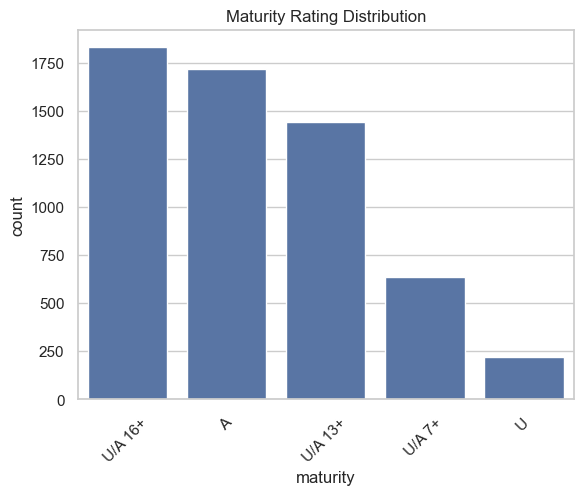

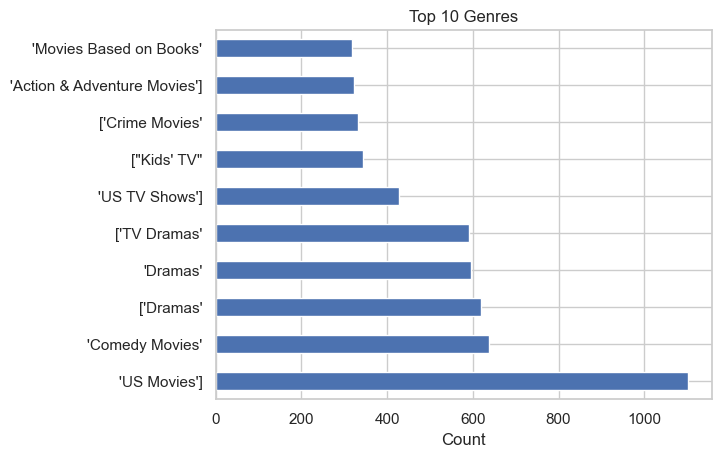

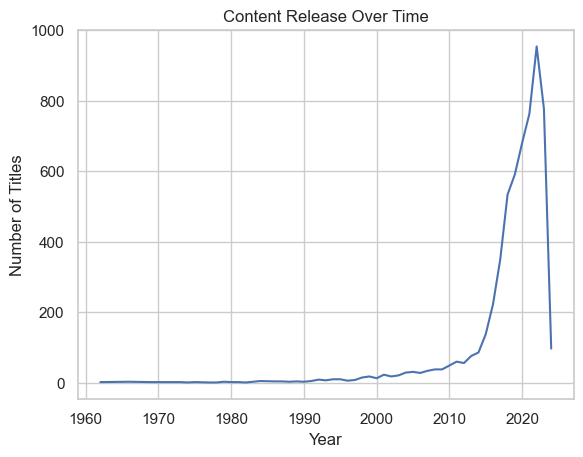

In [22]:
# Maturity rating distribution
sns.countplot(data=df, x='maturity', order=df['maturity'].value_counts().index)
plt.title('Maturity Rating Distribution')
plt.xticks(rotation=45)
plt.show()

# Top genres
genre_counts = pd.Series([genre for sublist in df['genre_list'].dropna() for genre in sublist])
top_genres = genre_counts.value_counts().head(10)
top_genres.plot(kind='barh', title='Top 10 Genres')
plt.xlabel('Count')
plt.show()

# Content release over time
df['year'].value_counts().sort_index().plot(kind='line', title='Content Release Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


### 7. Save Cleaned Dataset

In [23]:
df.to_csv('../data/processed/netflix_cleaned.csv', index=False)
